## Exploring job datasets from Monster.com

Monster.com is one of the largest job sites in the United States, providing a huge clearinghouse for employers and employee prospects to find one another on.

In this notebook we will explore this dataset, a sample of all Monster.com job postings in the United States. Going to do some exploratory analysis
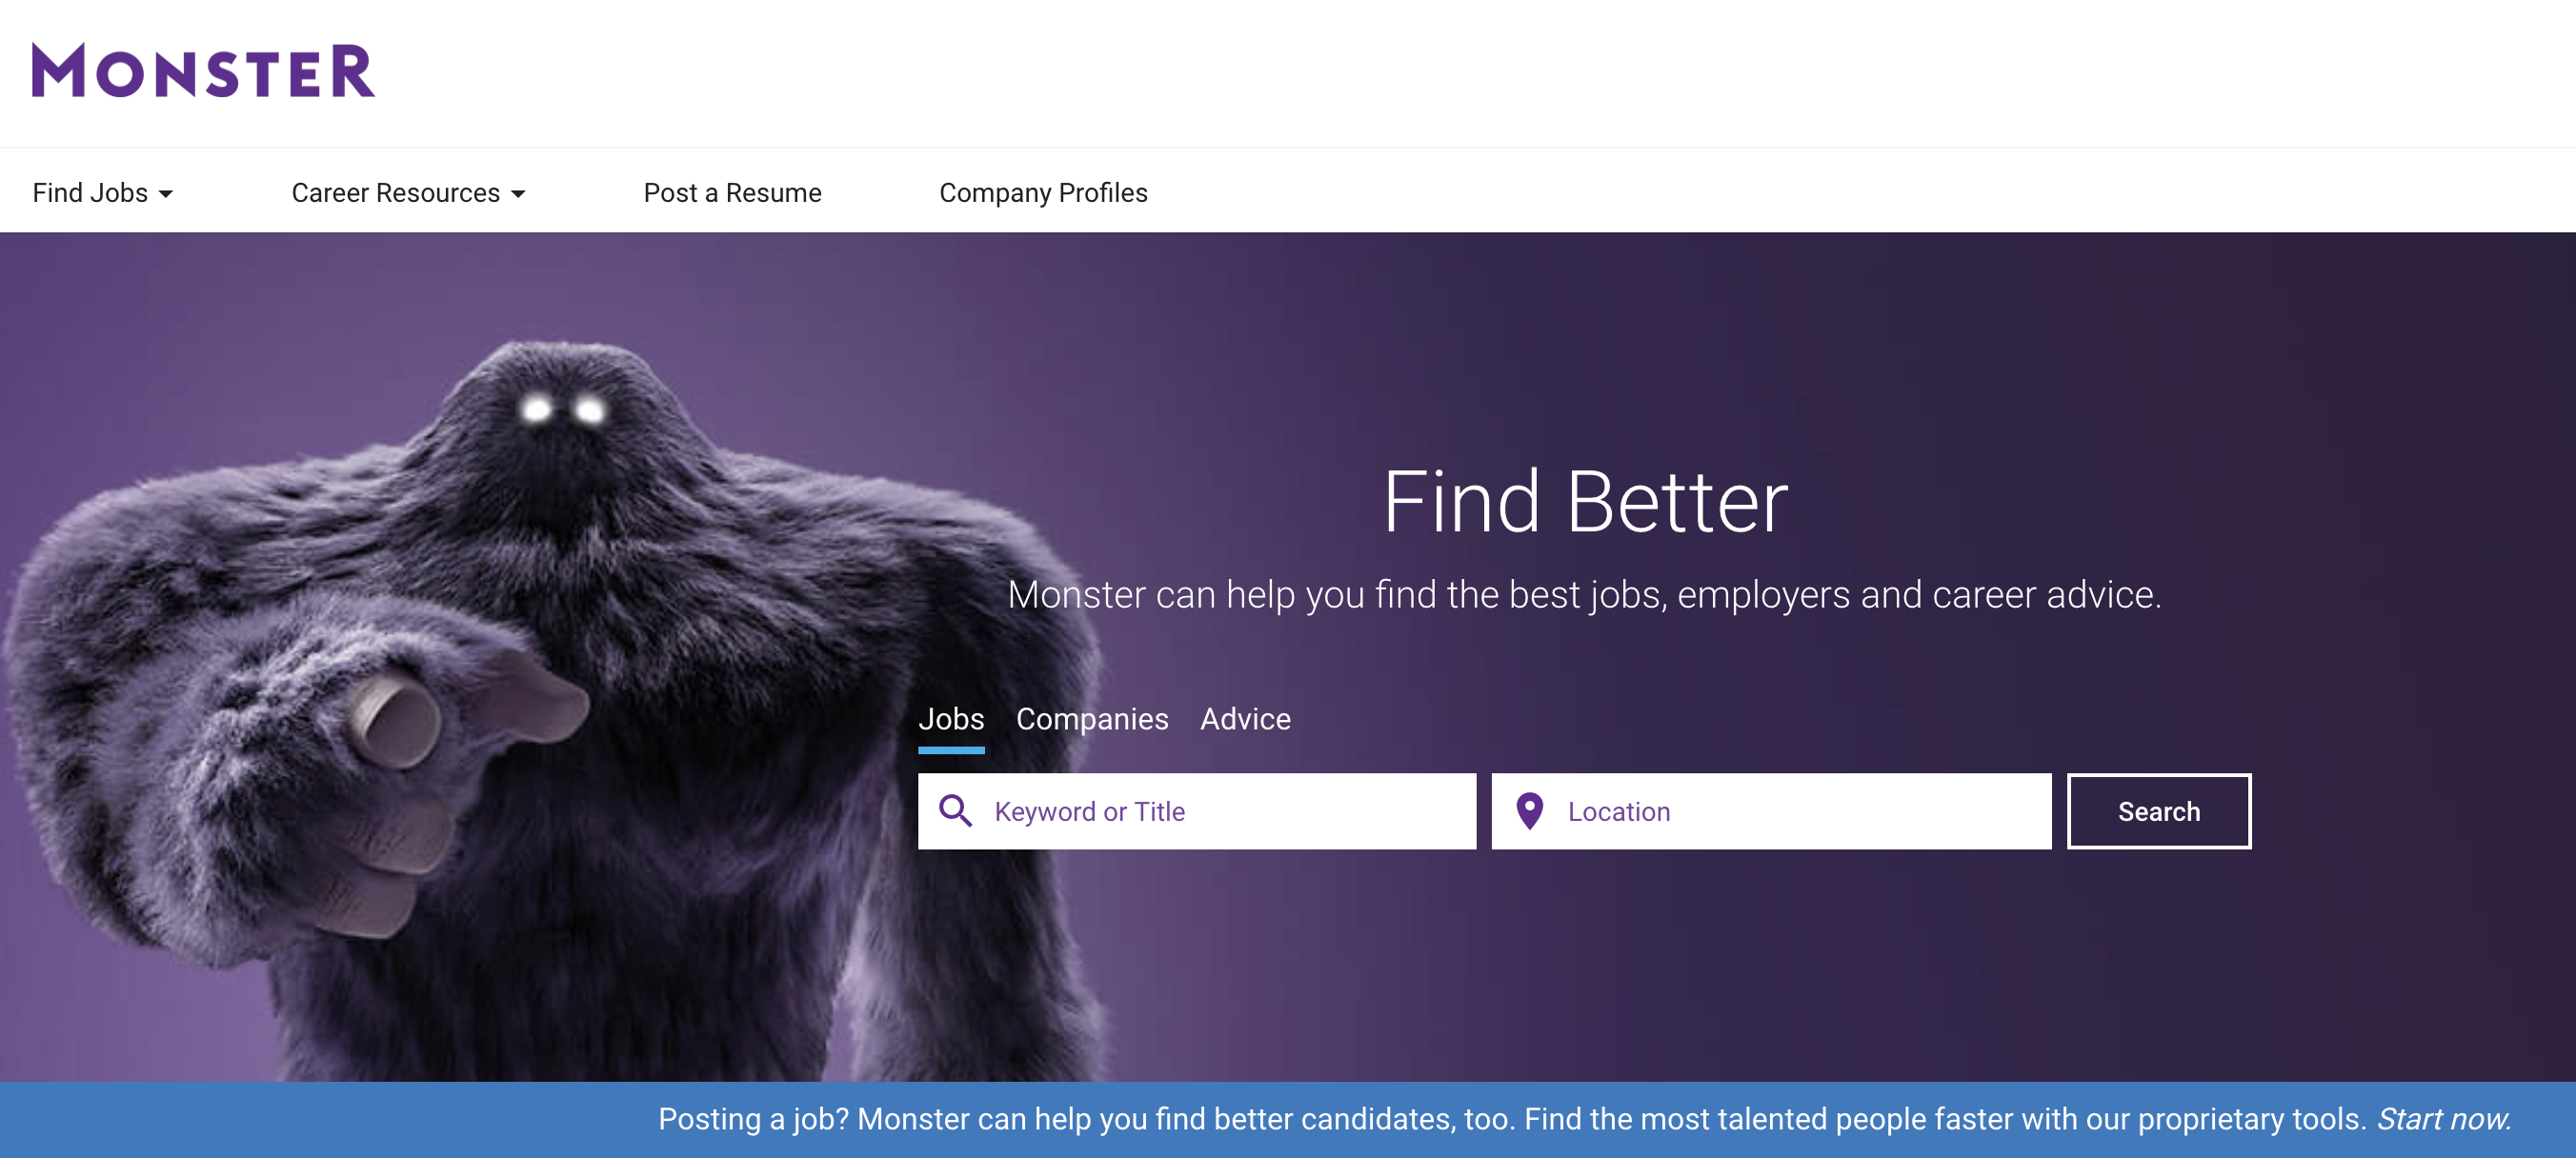

In [1]:
import numpy as np
import pandas as pd

In [20]:
jobs = pd.read_csv("monster_job.csv")

In [21]:
jobs = (jobs.drop(["job_board", "has_expired", "country", "country_code", "uniq_id"], axis = 'columns'))
jobs[:10]

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager)
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management
5,NaN,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager)
6,NaN,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,http://jobview.monster.com/principal-qa-engine...,NaN,NaN
7,NaN,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,http://jobview.monster.com/mailroom-clerk-job-...,NaN,Experienced (Non-Manager)
8,NaN,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,http://jobview.monster.com/housekeeper-job-aus...,NaN,Customer Support/Client Care
9,NaN,"Insituform Technologies, LLC, an Aegion compan...",Video Data Management /Transportation Technici...,NaN,"Chesterfield, MO",NaN,http://jobview.monster.com/video-data-manageme...,NaN,NaN


In [10]:
# # Clean up the fields a bit
# jobs = (jobs.drop(["job_board", "has_expired", "country", "country_code", "uniq_id"],
#                   axis='columns'))

In [51]:
jobs = jobs[jobs['location'].str.len() < 40] #get rid of all the rows that have a location with strings that are longer than 40 characters
def map_yearly_salary_range(val):
    if pd.isnull(val):
        return np.nan
    elif "/year" in val:
        part = val.split("/year")[0].replace("$", " ").strip()
        if "-" in part:
            mn, mx = part.split("-")[0:2]
            try:
                mn = float(mn.replace(",", "").strip())
                mx = float(mx.replace(",", "").strip())
            except:
                return np.nan
            return mn, mx
        
def map_hourly_salary_range(val):
    if pd.isnull(val):
        return np.nan
    elif "/hour" in val:
        part = val.split("/hour")[0].replace("$", " ").strip()
        if "-" in part:
            mn, mx = part.split("-")[0:2]
            try:
                mn = float(mn.replace(",", "").strip())
                mx = float(mx.replace(",", "").strip())
            except:
                return np.nan
            return mn, mx

In [61]:
jobs = jobs.assign(yearly_salary_range=jobs['salary'].map(map_yearly_salary_range),
                   hourly_salary_range=jobs['salary'].map(map_hourly_salary_range))

print("We found {0} yearly and {1} hourly salaries in the dataset.".format(
    jobs['yearly_salary_range'].notnull().sum(), jobs['hourly_salary_range'].notnull().sum()
))

jobs[:3]

We found 1653 yearly and 1048 hourly salaries in the dataset.


,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector,yearly_salary_range,hourly_salary_range
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,NaN,NaN
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,NaN,NaN
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),NaN,NaN


In [54]:
jobs['job_type'] = jobs['job_type'].map(
    lambda j: j if pd.isnull(j) else 'Full Time' if 'Full Time' in j else 'Part Time' if 'Part Time' in j else 'Other'
)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

In [67]:
trace1 = go.Bar(
        x = jobs['organization'].value_counts().index.tolist()[:10],
        y = jobs['organization'].value_counts()[:10],
        name = 'Industry Sector'
)
trace2 = go.Bar(
        x = jobs['sector'].value_counts().index.tolist()[:10],
        y = jobs['sector'].value_counts()[:10],
        name = 'Job Type'
)
fig = tools.make_subplots(rows =1 , cols=2, subplot_titles = ('Industry Sector', 'Job Type'))
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig['layout'].update(title = 'Monster Top 10 Jobs by..')
# trace2 = go.Bar(
#         x = 
#         y = 
#         name = 'Job Type')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [66]:
trace1 = go.Histogram(
        x = jobs['organization'].value_counts().index.tolist(),
        y = jobs['organization'].value_counts(),
        histnorm = 'probability',
        name = 'Industry Sector'
)
trace2 = go.Histogram(
        x = jobs['sector'].value_counts().index.tolist(),
        y = jobs['sector'].value_counts(),
        histnorm = 'probability',
        name = 'Job Type'
)
fig = tools.make_subplots(rows =1 , cols=2, subplot_titles = ('Industry Sector', 'Job Type'))
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig['layout'].update(title = 'Jobs Distribution')
# trace2 = go.Bar(
#         x = 
#         y = 
#         name = 'Job Type')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

Healthcare services seems to be the most popular sector on monster.com. there also seems to be a disproportionate amount of experienced yet non managerial people that are trying to find new jobs. 



## Median salaries¶
Which are the most indulgent salaries?

In [63]:
fig2 = tools.make_subplots(rows=2,cols=1, subplot_titles = ('Median Yearly Salary Offered','Median Hourly Salary Offered'))
jobs = jobs.assign(
    median_yearly_salary = jobs['yearly_salary_range'].map(
        lambda r: (r[0] + r[1]) / 2 if pd.notnull(r) else r
    ),
    median_hourly_salary = jobs['hourly_salary_range'].map(
        lambda r: (r[0] + r[1]) / 2 if pd.notnull(r) else r
    )
)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]

